In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
data = np.genfromtxt('mnist_train.csv', delimiter=',')

In [40]:
dim = 28
labels = my_data[:,0]
images = my_data[:,1:]

def getnumdata(label):
    numind = np.where(labels == label)
    numdata = images[numind]
    return(numdata)

eightdata = getnumdata(8)
numeight = len(eightdata[:, 0])
numtotal = len(images[:, 0])

In [32]:
# calculates average row
def avg(array):
    return(np.sum(array, axis=0) / len(array[:, 0]))

In [51]:
def compress(dataset, avgset, dim):
    datalen = len(dataset[:,0])
    avg_data = avg(avgset)
    dataset = dataset.T
    
    A = np.zeros((dim * dim, datalen), dtype=np.int16)
    for i in np.arange(datalen):
        A[:, i] = dataset[:, i].astype(np.int16) - avg_data.astype(np.int16)
        A[:, i][A[:, i] < 0] = 0
    A.astype(np.uint8)
    
    # covariance matrix
    S = np.matmul(A.T.astype(float), A.astype(float))
    # D is eigenvalues, V is eigenvectors
    D, V = np.linalg.eig(S)
    # sort D, and then sort V the same way to get the eigenvectors in descending order
    order = D.argsort()[::-1]
    V = V[:, order]

    # normalize U for output
    U = np.matmul(A.astype(float), V)
    U = np.real(U)
    squares = np.square(U)
    denom = np.sqrt(np.sum(squares, axis=0))
    for i in np.arange(datalen):
        U[:, i] = U[:, i] / denom[i]
    return([avg_data, U, dim])
        
def reconst(results, data, try_reconst, n_eig):
    omegas = np.matmul(results[1][:, 1:n_eig].T, (data[:, try_reconst].astype(float)) - results[0])
    res = np.matmul(results[1][:, 1:n_eig], omegas) + results[0].astype(float)

    fig, axes = plt.subplots(1,2)
    axes[0].imshow(np.reshape(data[:, try_reconst], (results[2], -1)), cmap='gray')
    axes[1].imshow(np.reshape(res, (results[2], -1)), cmap='gray')

In [49]:
var = compress(getnumdata(2), images, 28)

In [58]:
omegas = np.matmul(var[1][:, 1:n_eig].T, (getnumdata(2)[:, try_reconst].astype(float)) - var[0])

ValueError: operands could not be broadcast together with shapes (5958,) (784,) 

In [56]:
reconst(var, getnumdata(2), 0, 10)

ValueError: operands could not be broadcast together with shapes (5958,) (784,) 

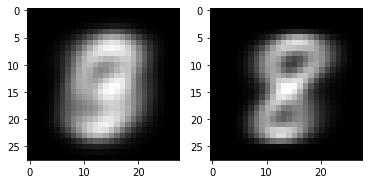

In [41]:
avg_all = avg(images)
avg_eight = avg(eightdata)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(np.reshape(avg_all, (dim, -1)), cmap='gray')
axes[1].imshow(np.reshape(avg_eight, (dim, -1)), cmap='gray')

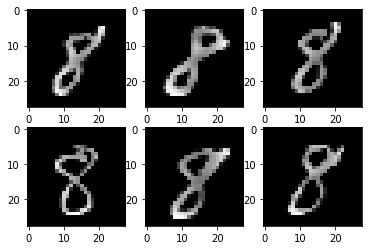

In [26]:
# cast all to int16 and subtract each image vector from the average before taking the outer product
eightdata = eightdata.T
A = np.zeros((dim * dim, numeight), dtype=np.int16)
for i in np.arange(numeight):
    A[:, i] = eightdata[:, i].astype(np.int16) - avg_all.astype(np.int16)
    A[:, i][A[:, i] < 0] = 0
A.astype(np.uint8)

In [27]:
# covariance matrix
S = np.matmul(A.T.astype(float), A.astype(float))
# D is eigenvalues, V is eigenvectors
D, V = np.linalg.eig(S)
# sort D, and then sort V the same way to get the eigenvectors in descending order
order = D.argsort()[::-1]
V = V[:, order]

# normalize U for output
U = np.matmul(A.astype(float), V)
U = np.real(U)
squares = np.square(U)
denom = np.sqrt(np.sum(squares, axis=0))
for i in np.arange(numeight):
    U[:, i] = U[:, i] / denom[i]

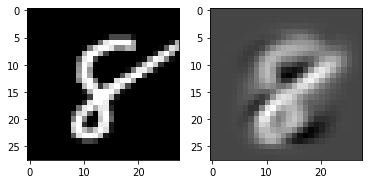

In [30]:
try_reconst = 50
n_eig = 10
omegas = np.matmul(U[:, 1:n_eig].T, (eightdata[:, try_reconst].astype(float)) - avg_all)
res = np.matmul(U[:, 1:n_eig], omegas) + avg_all.astype(float)

fig, axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(eightdata[:, try_reconst], (dim, -1)), cmap='gray')
axes[1].imshow(np.reshape(res, (dim, -1)), cmap='gray')